# [1] Import modules and functions

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import itertools
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# [2] Functions

## perm2array(n)
returns an all permutations of the set {0, 1, ..., n - 1} given n

For example:

perm2array(2)  returns

array([[0, 1],
       [1, 0]])

In [13]:

from itertools import permutations

def perm2array(n):
    perms = permutations(range(n))
    
    result = np.array(list(perms))
    
    return result




perm2array(3)


3


array([[0, 1, 2],
       [0, 2, 1],
       [1, 0, 2],
       [1, 2, 0],
       [2, 0, 1],
       [2, 1, 0]])

# [3] Techniques

Foward Map - Create a dictionary that maps levels to encodings

Use dictionary comprehension to create a dictionary whose keys are ['a', 'b'] (e.g. levels of a factor) and 

whose values are [0, 1] (e.g. a particular encoding of the levels, for example, perm2array(2)[0] ) 

{'a':0, 'b':1}

In [6]:
levels = ['A', 'B', 'C']
f = perm2array(3)[0]
print(f)
dict = {level: value for level, value in zip(levels, f)}

print(dict)

[0 1 2]
{'A': 0, 'B': 1, 'C': 2}


Inverse Map - Create a dictionary that maps encodings to levels

Use dictionary comprehension to create a dictionary whose keys are [0, 1] 
(e.g. a particular encoding of the levels, for example, perm2array(2)[0] ) 
and 

whose values are ['a', 'b'] (e.g. levels of a factor)

{0:'a', 1:'b'}

In [48]:
levels = ['A', 'B', 'C']
f = perm2array(3)[0]
print(f)
dictinverse = {level: value for level, value in zip(f, levels)}

print(dictinverse)

[0 1 2]
{0: 'A', 1: 'B', 2: 'C'}


# [4] Data

import treedata.csv into a dataframe df

report the levels of the factor X  

In [3]:
df = pd.read_csv('/Users/huwendi/Desktop/DS1/Homework/Mid term/treedata.csv', header = 0)
df.head()

,Unnamed: 0,X,Y
0,0,A,9.883319
1,1,A,9.910869
2,2,C,11.156120
3,3,B,11.975236
4,4,C,11.045973


# [5] Mapping and Reverse Mapping dictionaries if used in [6] to [8] for this dataset

In [ ]:
levels = ['A', 'B', 'C']
f = perm2array(3)[0]
print(f)
dict = {level: value for level, value in zip(levels, f)}

print(dict)

# [6] Split the Stump
encode X according to perm2array(3)[0], which is a particular encoding of the levels of X

Use DecisionTreeRegressor() to fit a tree with 2 terminal leaf nodes, which effectively splits the stump on X. 

Report the encoding scheme and the total ESS of the immedidate children resulting from this split. 

For example

orginal levels  ['A', 'B', 'C'] -> encoded levels  [#, #, #]

ESS =  #.#######

[Text(0.5, 0.75, 'x[0] <= 0.5\nsquared_error = 0.607\nsamples = 30\nvalue = 10.949'),
 Text(0.25, 0.25, 'squared_error = 0.007\nsamples = 9\nvalue = 9.976'),
 Text(0.75, 0.25, 'squared_error = 0.284\nsamples = 21\nvalue = 11.367')]

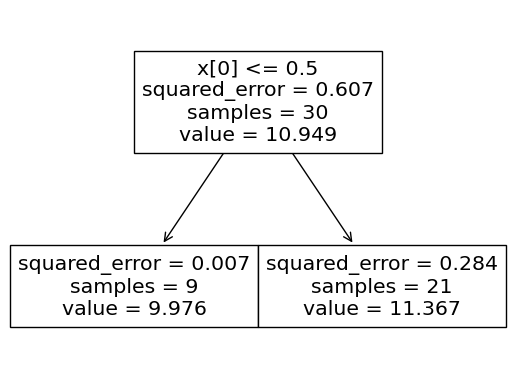

0

0.5

30

1

2

Encoding scheme: [0 1 2]
6.03366499442038


In [14]:
particular = perm2array(3)[0]#[0,1,2]
dfe=df.copy()
f=dfe['X'].map({'A':0, 'B':1, 'C':2})
lf=np.array(f)
tree = DecisionTreeRegressor(criterion = 'squared_error', max_depth = None, max_leaf_nodes = 2).fit(lf.reshape(-1,1), df.Y)
plot_tree(tree)
plt.show()
tree.tree_.feature[0]      # feature[i] is feature used for splitting node i; NA is -2
tree.tree_.threshold[0]    # cut value at node i; NA is -1
tree.tree_.n_node_samples[0]  # number of training samples reaching node i, NA is 1
tree.tree_.children_left[0] #  id of the left child of node i or -1 if leaf node
tree.tree_.children_right[0]


l_c = lf < tree.tree_.threshold[0]# left_child position in df
r_c = lf >= tree.tree_.threshold[0]
ess_l = np.sum((dfe.Y[l_c] - np.mean(dfe.Y[l_c]))**2)
ess_r = np.sum((dfe.Y[r_c] - np.mean(dfe.Y[r_c]))**2)
TESS=ess_l+ess_r

print(f"Encoding scheme: {particular}")
print(TESS)

# [7] Best encoding of levels 

loop through each encoding of the levels of X

calculate the ESS of the immedidate children resulting from the optimal split of the stump for each encoding scheme

use code to identify the BEST encoding scheme, the one associated with the smallest ESS.

use code to identify the WORST encoding scheme, the one associated with the largest ESS.

for example:

best encoding scheme index = #  ESS = #.#######
orginal levels  ['A', 'B', 'C'] -> encoded levels  [0, 2, 1]

worst encoding scheme index = #  ESS = #.#######
orginal levels  ['A', 'B', 'C'] -> encoded levels  [#, #, #]


In [22]:
levels = ['A', 'B', 'C']
final=[]
lg=[]
for i in range(5):
    g = perm2array(3)[i]
    dict = {level: value for level, value in zip(levels, g)}
    dfe=df.copy()
    f=dfe['X'].map(dict)
    lf=np.array(f)
    tree = DecisionTreeRegressor(criterion = 'squared_error', max_depth = None, max_leaf_nodes = 3).fit(lf.reshape(-1,1), df.Y)
    l_c = lf < tree.tree_.threshold[0]
    r_c = lf >= tree.tree_.threshold[0]
    ess_l = np.sum((dfe.Y[l_c] - np.mean(dfe.Y[l_c]))**2)
    ess_r = np.sum((dfe.Y[r_c] - np.mean(dfe.Y[r_c]))**2)
    TESS=ess_l+ess_r
    final.append(TESS)
    lg.append(g)

print(final)

print(min(final),  lg[final.index(min(final))])
print(max(final),   lg[final.index(max(final))])

[6.03366499442038, 5.592030773057395, 5.592030773057395, 5.592030773057395, 5.592030773057395]


array([0, 2, 1])

5.592030773057395 [0 2 1]
6.03366499442038 [0 1 2]


# [8] Optimal Split of the Stump
based on the best encoding scheme identified above

use code to report the optimal split of the stump, in terms of the actual levels (not the encoded levels) of X.

For example:

Stump: split feature 0 into ['Level Name', 'Level Name'] and ['Level Name']  
(for example, ['B', 'C'] and ['A'])

In [72]:
o=lg[final.index(min(final))]#optimal_encoding
dict = {level: value for level, value in zip(levels, o)}
dictinverse = {level: value for level, value in zip(o, levels)}
dfe=df.copy()
f=dfe['X'].map(dict)
lf=np.array(f)
tree = DecisionTreeRegressor(criterion = 'squared_error', max_depth = None, max_leaf_nodes = 3).fit(lf.reshape(-1,1), df.Y)

cut=tree.tree_.threshold[0]

left = []
for v in o:
    if v < cut:
        left.append(dictinverse[v])
print(left)

right = []
for v in o:
    if v > cut:
        right.append(dictinverse[v])
print(right)


['A', 'C']
['B']
